In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df = pd.read_csv('sample_labeled_data (1).csv')
df

,Model Name,Column Name,Transaction Value (Count or Avg),Transcation Month (YYYY|MM),IsAnAnomaly,Snapshot Month (YYYYMM)
0,TABLE_1,Column_756,428838.84,2016|02,NO,202104
1,TABLE_1,Column_756,569641.20,2016|03,NO,202104
2,TABLE_1,Column_756,446080.47,2016|04,NO,202104
3,TABLE_1,Column_756,498157.66,2016|05,NO,202104
4,TABLE_1,Column_756,521634.10,2016|06,NO,202104
...,...,...,...,...,...,...
2740,TABLE_1,Column_1815,0.00,2020|08,NaN,202102
2741,TABLE_1,Column_1815,0.00,2020|09,NaN,202102
2742,TABLE_1,Column_1815,0.00,2020|10,NaN,202102
2743,TABLE_1,Column_1815,0.00,2020|11,NaN,202102


In [3]:
df.shape

(2745, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Model Name                        2745 non-null   object 
 1   Column Name                       2745 non-null   object 
 2   Transaction Value (Count or Avg)  2745 non-null   float64
 3   Transcation Month (YYYY|MM)       2745 non-null   object 
 4   IsAnAnomaly                       915 non-null    object 
 5   Snapshot Month (YYYYMM)           2745 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 128.8+ KB


- column IsAnAnomaly has only 915 non null values out of 2745

In [5]:
df.describe()

,Transaction Value (Count or Avg),Snapshot Month (YYYYMM)
count,2.745000e+03,2745.000000
mean,3.349557e+06,202094.377778
std,7.714498e+06,25.830867
min,0.000000e+00,202011.000000
25%,0.000000e+00,202101.000000
50%,1.649302e+05,202102.000000
75%,2.632313e+06,202103.000000
max,3.964377e+07,202104.000000


- Difference between mean and meadian is significant for column Transaction Value (Count or Avg). So, it is not following normal distribution. 

In [6]:
df.dtypes

Model Name                           object
Column Name                          object
Transaction Value (Count or Avg)    float64
Transcation Month (YYYY|MM)          object
IsAnAnomaly                          object
Snapshot Month (YYYYMM)               int64
dtype: object

#### Data Preprocessing

In [7]:
# Changing Transcation Month (YYYY|MM) and Snapshot Month (YYYYMM) columns data type into datetime objects
df['Transcation Month (YYYY|MM)'] = df['Transcation Month (YYYY|MM)'].apply(lambda x: x.split('|'))
df['Transcation Month (YYYY|MM)'] = df['Transcation Month (YYYY|MM)'].apply(lambda x: ''.join(x))
df['Transcation Month (YYYY|MM)'] = pd.to_datetime(df['Transcation Month (YYYY|MM)'], format='%Y%m')
df['Snapshot Month (YYYYMM)'] = pd.to_datetime(df['Snapshot Month (YYYYMM)'], format='%Y%m')
df

,Model Name,Column Name,Transaction Value (Count or Avg),Transcation Month (YYYY|MM),IsAnAnomaly,Snapshot Month (YYYYMM)
0,TABLE_1,Column_756,428838.84,2016-02-01,NO,2021-04-01
1,TABLE_1,Column_756,569641.20,2016-03-01,NO,2021-04-01
2,TABLE_1,Column_756,446080.47,2016-04-01,NO,2021-04-01
3,TABLE_1,Column_756,498157.66,2016-05-01,NO,2021-04-01
4,TABLE_1,Column_756,521634.10,2016-06-01,NO,2021-04-01
...,...,...,...,...,...,...
2740,TABLE_1,Column_1815,0.00,2020-08-01,NaN,2021-02-01
2741,TABLE_1,Column_1815,0.00,2020-09-01,NaN,2021-02-01
2742,TABLE_1,Column_1815,0.00,2020-10-01,NaN,2021-02-01
2743,TABLE_1,Column_1815,0.00,2020-11-01,NaN,2021-02-01


In [8]:
#preprocessing of column Name
df['Column Name'] = df['Column Name'].apply(lambda x: x.split('_')[1])
df

,Model Name,Column Name,Transaction Value (Count or Avg),Transcation Month (YYYY|MM),IsAnAnomaly,Snapshot Month (YYYYMM)
0,TABLE_1,756,428838.84,2016-02-01,NO,2021-04-01
1,TABLE_1,756,569641.20,2016-03-01,NO,2021-04-01
2,TABLE_1,756,446080.47,2016-04-01,NO,2021-04-01
3,TABLE_1,756,498157.66,2016-05-01,NO,2021-04-01
4,TABLE_1,756,521634.10,2016-06-01,NO,2021-04-01
...,...,...,...,...,...,...
2740,TABLE_1,1815,0.00,2020-08-01,NaN,2021-02-01
2741,TABLE_1,1815,0.00,2020-09-01,NaN,2021-02-01
2742,TABLE_1,1815,0.00,2020-10-01,NaN,2021-02-01
2743,TABLE_1,1815,0.00,2020-11-01,NaN,2021-02-01


- To represent Column Name column values, splitted the each record to get it represented in numeric data type, discarded string elements, instead of applying encoding technique.

#### Dividing the dataset into Labelled (Yes or No) and unlabelled (NA) using IsAnAnomaly column

- We will split the data into labelled and unlabelled. We train a model on labelled dataset, using this model, we predict labels for unlabelled data.

In [9]:
# creating labelled dataset
labeled_df = df.dropna()

In [10]:
# Assigning df to variable_copy. so that we can keep our actual dataset as it is
df1 = df 
# replacing NA values with a string 'unknown' to perform some analysis
df1['IsAnAnomaly'].fillna(value='unknown',inplace = True)
# creating unlabelled dataset
unlabeled_df = df1[df1['IsAnAnomaly'] == 'unknown']
unlabeled_df

,Model Name,Column Name,Transaction Value (Count or Avg),Transcation Month (YYYY|MM),IsAnAnomaly,Snapshot Month (YYYYMM)
61,TABLE_1,756,528349.70,2016-01-01,unknown,2021-03-01
62,TABLE_1,756,428838.84,2016-02-01,unknown,2021-03-01
63,TABLE_1,756,569641.20,2016-03-01,unknown,2021-03-01
64,TABLE_1,756,446080.47,2016-04-01,unknown,2021-03-01
65,TABLE_1,756,498157.66,2016-05-01,unknown,2021-03-01
...,...,...,...,...,...,...
2740,TABLE_1,1815,0.00,2020-08-01,unknown,2021-02-01
2741,TABLE_1,1815,0.00,2020-09-01,unknown,2021-02-01
2742,TABLE_1,1815,0.00,2020-10-01,unknown,2021-02-01
2743,TABLE_1,1815,0.00,2020-11-01,unknown,2021-02-01


#### Building predictive models using labeled data

In [11]:
labeled_df['IsAnAnomaly'].unique()

array(['NO', 'YES'], dtype=object)

- Labelled dataset's dependent variables has two classes in it i.e Yes and No

In [12]:
labeled_df['IsAnAnomaly'].value_counts()

NO     610
YES    305
Name: IsAnAnomaly, dtype: int64

<AxesSubplot:xlabel='IsAnAnomaly', ylabel='Count'>

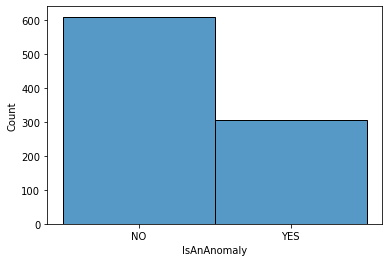

In [13]:
sns.histplot(labeled_df['IsAnAnomaly'])

- Clear imbalance between output classes

In [14]:
# Filtering the dataset considering required columns
columns = ['Column Name','Transaction Value (Count or Avg)','Snapshot Month (YYYYMM)','IsAnAnomaly'] 

In [15]:
l_df = labeled_df.reindex(columns = columns)
l_df

,Column Name,Transaction Value (Count or Avg),Snapshot Month (YYYYMM),IsAnAnomaly
0,756,428838.84,2021-04-01,NO
1,756,569641.20,2021-04-01,NO
2,756,446080.47,2021-04-01,NO
3,756,498157.66,2021-04-01,NO
4,756,521634.10,2021-04-01,NO
...,...,...,...,...
2618,1815,0.00,2021-04-01,NO
2619,1815,0.00,2021-04-01,NO
2620,1815,0.00,2021-04-01,NO
2621,1815,0.00,2021-04-01,NO


In [16]:
# Representing dependent variable values with binary
l_df['IsAnAnomaly'] = l_df['IsAnAnomaly'].map({'YES':1,'NO':0})
l_df

,Column Name,Transaction Value (Count or Avg),Snapshot Month (YYYYMM),IsAnAnomaly
0,756,428838.84,2021-04-01,0
1,756,569641.20,2021-04-01,0
2,756,446080.47,2021-04-01,0
3,756,498157.66,2021-04-01,0
4,756,521634.10,2021-04-01,0
...,...,...,...,...
2618,1815,0.00,2021-04-01,0
2619,1815,0.00,2021-04-01,0
2620,1815,0.00,2021-04-01,0
2621,1815,0.00,2021-04-01,0


In [17]:
l_df.isna().sum()

Column Name                         0
Transaction Value (Count or Avg)    0
Snapshot Month (YYYYMM)             0
IsAnAnomaly                         0
dtype: int64

- Dataset has no Nan values

In [18]:
# Calculating average of the column Transaction Value (Count or Avg). So that we can replace zero values of the column with this mean value.
values = []
for i in df['Transaction Value (Count or Avg)']:
    if i != 0:
        values.append(i)
        
np.mean(values)

4903751.637969675

In [19]:
# Replacing 0.00 with the coulumn's mean value
l_df['Transaction Value (Count or Avg)'].replace(0.00,4903751.63,inplace=True)
l_df

,Column Name,Transaction Value (Count or Avg),Snapshot Month (YYYYMM),IsAnAnomaly
0,756,428838.84,2021-04-01,0
1,756,569641.20,2021-04-01,0
2,756,446080.47,2021-04-01,0
3,756,498157.66,2021-04-01,0
4,756,521634.10,2021-04-01,0
...,...,...,...,...
2618,1815,4903751.63,2021-04-01,0
2619,1815,4903751.63,2021-04-01,0
2620,1815,4903751.63,2021-04-01,0
2621,1815,4903751.63,2021-04-01,0


In [20]:
l_df['IsAnAnomaly'].value_counts()

0    610
1    305
Name: IsAnAnomaly, dtype: int64

- Imbalance in the classes of dependent variable

In [21]:
# Separaitng predictors
x = l_df.drop(['IsAnAnomaly','Snapshot Month (YYYYMM)'],axis=1)
x

,Column Name,Transaction Value (Count or Avg)
0,756,428838.84
1,756,569641.20
2,756,446080.47
3,756,498157.66
4,756,521634.10
...,...,...
2618,1815,4903751.63
2619,1815,4903751.63
2620,1815,4903751.63
2621,1815,4903751.63


In [22]:
# scaling the data
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled

array([[0.        , 0.0108215 ],
       [0.        , 0.01437458],
       [0.        , 0.01125658],
       ...,
       [1.        , 0.12374406],
       [1.        , 0.12374406],
       [1.        , 0.12374406]])

In [23]:
# Separating dependent variable
y = l_df['IsAnAnomaly']

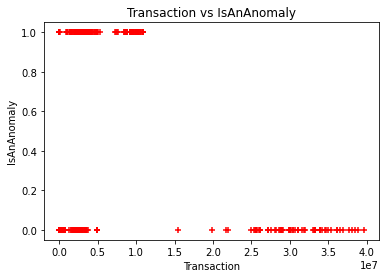

In [24]:
# visualizing the distribution of input vs output values
plt.scatter(l_df['Transaction Value (Count or Avg)'],l_df['IsAnAnomaly'],marker='+',color='red')
plt.xlabel('Transaction')
plt.ylabel('IsAnAnomaly')
plt.title('Transaction vs IsAnAnomaly')
plt.show()

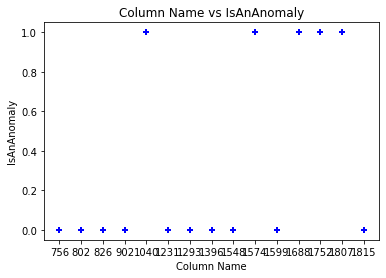

In [25]:
plt.scatter(l_df['Column Name'],l_df['IsAnAnomaly'],marker='+',color='blue')
plt.xlabel('Column Name')
plt.ylabel('IsAnAnomaly')
plt.title('Column Name vs IsAnAnomaly')
plt.show()

In [26]:
#Importing Scikit learn to split data into train and test
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,train_size=0.63,shuffle=True,stratify=y,random_state=3)

In [28]:
y_train.value_counts()

0    384
1    192
Name: IsAnAnomaly, dtype: int64

In [29]:
y_test.value_counts()

0    226
1    113
Name: IsAnAnomaly, dtype: int64

- After applying stratification train and test data is having equal proportion of classes in it. Data is still imbalanced.

Now, let's try different ML models and finalize a model which gives us the reliable results

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
#Fitting the model to the train data
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Checking model's scores
model.score(X_test,y_test), model.score(X_train,y_train)
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.7964601769911505
Train accuracy: 0.8020833333333334


In [33]:
# Predicting y values for test data 
y_predicted = model.predict(X_test)

In [34]:
cm_log = confusion_matrix(y_test, y_predicted)
print(cm_log)

[[203  23]
 [ 46  67]]


In [35]:
#checking model coefficients
model.coef_

array([[ 3.19829103, -2.06145921]])

In [36]:
#checking model intercept_
model.intercept_

array([-2.39765379])

In [37]:
y_predicted = model.predict(X_test)

In [38]:
#check probability values for test data
#model.predict_proba(X_test)

In [39]:
# Confusion matrix
cm_log = confusion_matrix(y_test, y_predicted)
print(cm_log)

[[203  23]
 [ 46  67]]


Text(69.0, 0.5, 'Truth')

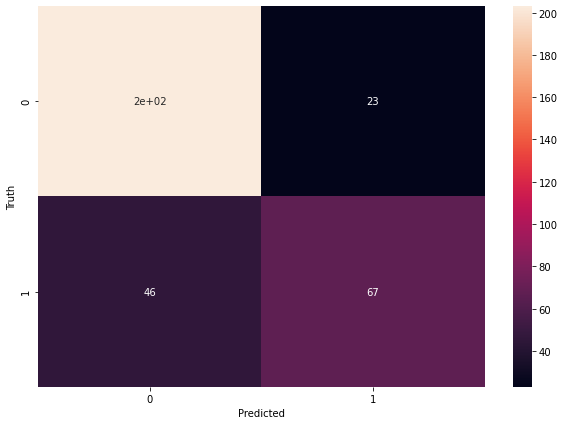

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
#Checking precission, recall and F1 score to understand the model performance
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       226
           1       0.74      0.59      0.66       113

    accuracy                           0.80       339
   macro avg       0.78      0.75      0.76       339
weighted avg       0.79      0.80      0.79       339



- Eventhough the accuracy is good, model not performing well in classifying class-1. 

#### Model Support Vector Machines (SVM)

Using SVM's linear kernal

In [42]:
#Importing svm and fitting it to the data
from sklearn.svm import SVC
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [43]:
#checking model score on train data
model_linear.score(X_train, y_train)
print(f'Train accuracy: {model_linear.score(X_train, y_train)}')

Train accuracy: 0.7430555555555556


In [44]:
model_linear.score(X_test, y_test)
print(f'Test accuracy: {model_linear.score(X_test, y_test)}')

Test accuracy: 0.6991150442477876


In [45]:
# Predicting y values of test data
y_predSVL = model_linear.predict(X_test)

In [46]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_predSVL)
print(cm_svm)

[[152  74]
 [ 28  85]]


In [47]:
#Checking precission, recall and F1 score to understand the model performance
print(classification_report(y_test,y_predSVL))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75       226
           1       0.53      0.75      0.62       113

    accuracy                           0.70       339
   macro avg       0.69      0.71      0.69       339
weighted avg       0.74      0.70      0.71       339



- Using SVM's linear kernal is model is not giving desired result

Using RBF Kernal

In [48]:
from sklearn.svm import SVC
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)

SVC()

In [49]:
model_rbf.score(X_train, y_train), model_linear.score(X_test, y_test)
print(f'Train accuracy: {model_rbf.score(X_train, y_train)}')
print(f'Test accuracy: {model_rbf.score(X_test, y_test)}')


Train accuracy: 0.8003472222222222
Test accuracy: 0.7964601769911505


In [50]:
# Predicting y values for test data
y_predRBF = model_rbf.predict(X_test)

In [51]:
cm_rbf = confusion_matrix(y_test, y_predRBF)
print(cm_svm)

[[152  74]
 [ 28  85]]


In [52]:
print(classification_report(y_test,y_predRBF))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       226
           1       0.74      0.59      0.66       113

    accuracy                           0.80       339
   macro avg       0.78      0.75      0.76       339
weighted avg       0.79      0.80      0.79       339



- Even though accuracy is good compared to linear kernel, precission, recall and f1 for each class is not desirable. This is due to imbalance data.

#### Model XGBoost

In [53]:
# Importing XGboost
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [54]:
# fitting the xgboost classifier to the training data
xgb_cl.fit(X_train, y_train)

[20:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
xgb_cl.score(X_train, y_train), xgb_cl.score(X_test, y_test)
print(f'Train accuracy: {xgb_cl.score(X_train, y_train)}')
print(f'Test accuracy: {xgb_cl.score(X_test, y_test)}')

Train accuracy: 1.0
Test accuracy: 1.0


- Model is overfitting

In [56]:
# Predicting y values of test data
preds = xgb_cl.predict(X_test)

In [57]:
# Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

1.0

In [58]:
cm_xg = confusion_matrix(y_test, preds)
print(cm_xg)

[[226   0]
 [  0 113]]


##### Calculating precission and recall

In [59]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       113

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339



##### Finalized model:
- Among Logistic regression , SVM with linear, Rbf kernal and Xgboost, Xgboost is performing well.
- Even though the model is overfitting, that we could expect with such a small dataset. 
- So we can finalize our model Xgboost. we can still treat overfitting using regulerization techniques.

Now we have to use this model to predict the labels of unlabelled data

#### Predict labels for unlabeled data

In [60]:
#unlabelled dataset
unlabeled_df.head()
unlabeled_df

,Model Name,Column Name,Transaction Value (Count or Avg),Transcation Month (YYYY|MM),IsAnAnomaly,Snapshot Month (YYYYMM)
61,TABLE_1,756,528349.70,2016-01-01,unknown,2021-03-01
62,TABLE_1,756,428838.84,2016-02-01,unknown,2021-03-01
63,TABLE_1,756,569641.20,2016-03-01,unknown,2021-03-01
64,TABLE_1,756,446080.47,2016-04-01,unknown,2021-03-01
65,TABLE_1,756,498157.66,2016-05-01,unknown,2021-03-01
...,...,...,...,...,...,...
2740,TABLE_1,1815,0.00,2020-08-01,unknown,2021-02-01
2741,TABLE_1,1815,0.00,2020-09-01,unknown,2021-02-01
2742,TABLE_1,1815,0.00,2020-10-01,unknown,2021-02-01
2743,TABLE_1,1815,0.00,2020-11-01,unknown,2021-02-01


In [61]:
# considering required columns
columns = ['Column Name','Transaction Value (Count or Avg)'] 

In [62]:
# redefining the dataframe
Nl_df = unlabeled_df.reindex(columns = columns)
Nl_df

,Column Name,Transaction Value (Count or Avg)
61,756,528349.70
62,756,428838.84
63,756,569641.20
64,756,446080.47
65,756,498157.66
...,...,...
2740,1815,0.00
2741,1815,0.00
2742,1815,0.00
2743,1815,0.00


In [63]:
#checking NaN values
Nl_df.isna().sum()

Column Name                         0
Transaction Value (Count or Avg)    0
dtype: int64

- No Nan values

In [64]:
# Calculated average of column 'Transaction Value (Count or Avg)' over the actual dataset
Nl_df['Transaction Value (Count or Avg)'].replace(0.00,4903751.63,inplace=True)
Nl_df

,Column Name,Transaction Value (Count or Avg)
61,756,528349.70
62,756,428838.84
63,756,569641.20
64,756,446080.47
65,756,498157.66
...,...,...
2740,1815,4903751.63
2741,1815,4903751.63
2742,1815,4903751.63
2743,1815,4903751.63


In [65]:
# scaling the data
min_max_scaler = MinMaxScaler()
x_scaledNL = min_max_scaler.fit_transform(Nl_df)
x_scaledNL

array([[0.        , 0.01332733],
       [0.        , 0.0108172 ],
       [0.        , 0.01436889],
       ...,
       [1.        , 0.1236953 ],
       [1.        , 0.1236953 ],
       [1.        , 0.1236953 ]])

In [66]:
#Predicting the labels using the already built model
NL_preds = xgb_cl.predict(x_scaledNL) 

In [67]:
# Predicted labels
NL_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
# Attaching the predicted labels as column to the unlabelled dataset
Nl_df['IsAnAnomaly'] = NL_preds
# Now the dataset with predicted labels
Nl_df

,Column Name,Transaction Value (Count or Avg),IsAnAnomaly
61,756,528349.70,0
62,756,428838.84,0
63,756,569641.20,0
64,756,446080.47,0
65,756,498157.66,0
...,...,...,...
2740,1815,4903751.63,0
2741,1815,4903751.63,0
2742,1815,4903751.63,0
2743,1815,4903751.63,0


In [69]:
# Checking the count of each class of predicted labels
Nl_df['IsAnAnomaly'].value_counts()

0    1220
1     610
Name: IsAnAnomaly, dtype: int64

- Our model prected out of 1830 NA values 1220 are No anomaly and 610 are anomaly.
- Here 'No' anomalies are twice as 'yes' anomalies, It is the same pattern what we found in the initial analysis.

##### Desclaimer:
    Here, the reason for choosing XGboost as the final model, despite the fact that it is overfitting, is that the dataset is too small and it has the same pattern behaviour when predicting labels as we discovered during our initial data analysis.

Please check Documentation.pdf for explanation.